In [11]:
import cv2
import numpy as np
import os
import math
from sklearn.cluster import KMeans
from scripts.utils import *
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

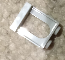

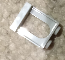

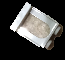

In [25]:
img = loadImage(50)
render(img)

# Apply Gaussian blur
img = cv2.GaussianBlur(img, (1, 1), 0)
render(img)



# Define image mask for the GrabCut output with same dimensions as the image
mask = np.zeros(img.shape[:2], np.uint8)

# Define the bounding box coordinates with the object of interest: (x, y, width, heigh)
bb = (0, 0, img.shape[1] - 1, img.shape[0] -1)

# Allocate memory for the two arrays that this algorithm internally uses for the segmentation of the foreground and background
bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)

# Apply GrabCut
(mask, bgModel, fgModel) = cv2.grabCut(img, mask, bb, bgModel, fgModel, 5, cv2.GC_INIT_WITH_RECT)

# All definite background and probable background pixels are set to 0, and all definite foreground and probable foreground pixels are set to 1
output_mask = np.where((mask == cv2.GC_BGD) | (mask == cv2.GC_PR_BGD), 0, 1)

# Scale the mask from the range [0, 1] to [0, 255]
output_mask = (output_mask * 255).astype("uint8")

# Apply a bitwise AND to the image using the generated mask by GrabCut to obtain the final result
grabcut_result = cv2.bitwise_and(img, img, mask=output_mask)

# Show result
render(grabcut_result)